# Cell phenotyping by unsupervised clustering of the single cell data

In [1]:
# import packages
import scimap as sm
import anndata as ad

Running SCIMAP  1.3.8


/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [2]:
# Load the data that we saved in the last tutorial - (Prepare data for SCIMAP)
adata = ad.read_h5ad('/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/scimapExampleData.h5ad')

`sm.tl.cluster` function can be used for clustering cells within the dataset. It supports three popular clustering algorithms:

- kmeans
- phenograph
- leiden
 
Users are encouraged to select the clustering algorithm that best matches their data's nature and their analytical goals.

In [37]:
adata = sm.tl.cluster(adata, method='leiden', resolution=0.3, use_raw=False, log=False)

Leiden clustering


/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning:

Setting element `.obsm['X_pca']` of view, initializing view as actual.



In [38]:
# view the results
adata.obs['leiden'].value_counts()

leiden
0    3895
1    2661
2    1563
3    1223
4     820
5     496
6     462
7      81
Name: count, dtype: int64

Now, let us construct a heatmap to examine the expression levels of specific markers across each identified cluster.

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/plotting/heatmap.py:318: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



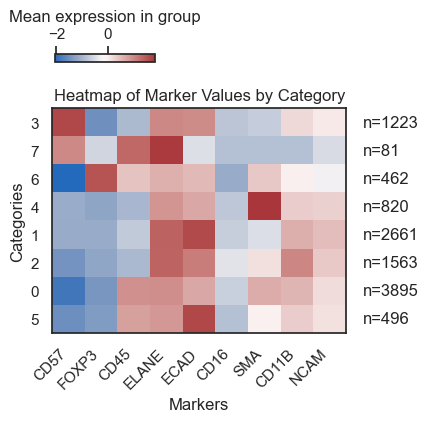

In [39]:
sm.pl.heatmap(adata, groupBy='leiden', standardScale='column', figsize=(5,4), showPrevalence=True)

Based on the expression profile of markers, we shall assign a cell type to each cluster. Utilize the `rename` function for this purpose.

In [61]:
rename_dict = {'Tumor': ['5','1'],
               'Myeloid': ['2'],
               'Treg': ['6'],
               'Vessels': ['4'],
               'Artifacts': ['7'],
                'Immune': ['3','0']}

adata = sm.hl.rename(adata, rename=rename_dict, from_column='leiden', to_column='leiden_phenotype')

Renaming 5 to Tumor
Renaming 1 to Tumor
Renaming 2 to Myeloid
Renaming 6 to Treg
Renaming 4 to Vessels
Renaming 7 to Artifacts
Renaming 3 to Immune
Renaming 0 to Immune


/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/plotting/heatmap.py:318: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



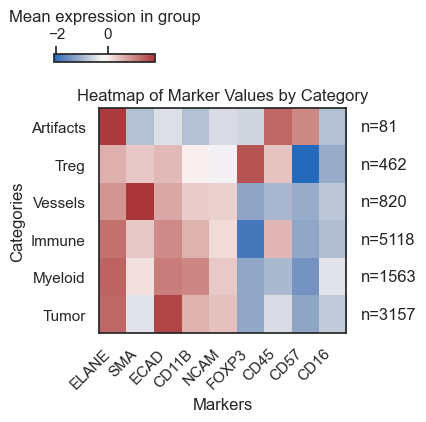

In [62]:
# now rebuild the heatmap to verify the expression pattern of markers within each cell type
sm.pl.heatmap(adata, groupBy='leiden_phenotype', standardScale='column', figsize=(5,4), showPrevalence=True)

I often overlay the defined cell types on a spatial scatterplot too, just to see if they match up with the tissue's histology.

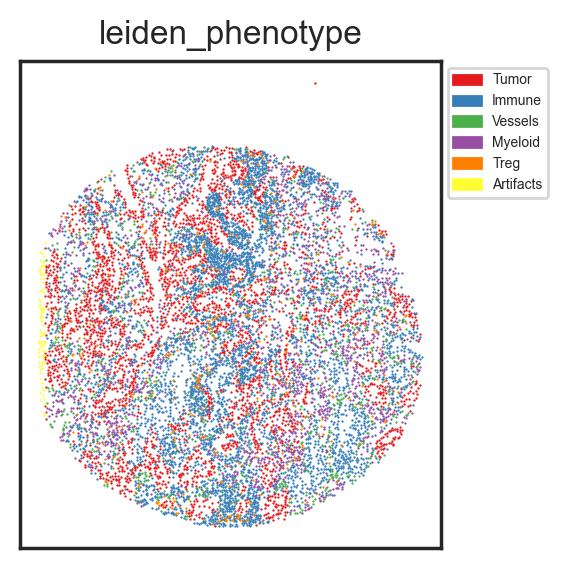

In [63]:
sm.pl.spatial_scatterPlot (adata, colorBy = ['leiden_phenotype'],figsize=(3,3), s=0.7, fontsize=5, catCmap='Set1')

While useful, to ensure accurate cell type assignment, you'd want to overlay the cell types on the actual image. By examining marker combinations, confirm the assignments are correct. If not, adjust the clustering parameters and refine the cell types.

In [66]:
# pass in the path to the image
image_path = '/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/registration/exemplar-001.ome.tif'

# view in napari
sm.pl.image_viewer(image_path=image_path, 
                   adata=adata, 
                   overlay='leiden_phenotype', 
                   point_size=10,
                   point_color='white')

# Note that if your AnnotatedData object (adata) includes multiple images, 
# you can use the `subset` parameter to specify the image name found in the `imageid` column, 
# enabling the loading of just that particular image.

### Save Results

In [ ]:
# Save the results
adata.write('/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/scimapExampleData.h5ad')